In [1]:
from pathlib import Path
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import re



In [2]:
setting_dict = {
'setting1' : ['12348/session_1','12354/session_2','12355/session_2'],
'setting2' : ['12349/session_1','12348/session_2','12350/session_1'],
'setting3' : ['12345/session_1','12353/session_1','12354/session_2','12355/session_2'],
'setting4' : ['12346/session_1','12349/session_2','12352/session_1','12351/session_1'],
'setting5' : ['12345/session_2','12346/session_2','12350/session_2','12351/session_2','12352/session_2','12353/session_2'],
}

In [3]:
data_dir = Path.cwd()
data_dir = data_dir / 'User_data'

In [4]:
#a fnctio to find deviation from the mean
def find_deviation_from_mean(data):
    mean = np.mean(data)
    return data - mean


In [5]:
file = 'User_data/12345/session_1/12345_session_1_22-03-2023_21-53_pulse_data.txt'

def getPulseData(file):
    pulse_data= []
    with open(file, 'r') as f:
        for line in f:
            line = line.strip()
            line = line.split('||')[2]
            pulse = line.split(',')[0][1:]
            pulse = float(pulse)
            if(pulse>=100.0):
                continue
            if(pulse<=60.0):
                #append any random value between 60.0 too 80.0
                val = float(random.randint(60, 80))
                pulse_data.append(val)
            pulse_data.append(float(pulse))
    return pulse_data

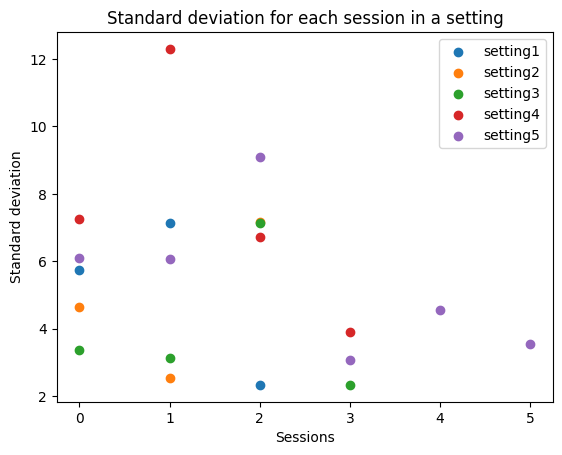

In [6]:
avg_mean_deviation = []
for key,value in setting_dict.items():
    for sess in value:
        path = data_dir / sess
        for file in path.iterdir():
            if(str(file).endswith('pulse_data.txt')):
                pulse_data = getPulseData(file)
                #find standard deviation
                std = np.std(pulse_data)
                avg_mean_deviation.append(std)

    plt.scatter([x for x in range(len(avg_mean_deviation))],avg_mean_deviation,alpha=1)
    plt.legend(['setting1','setting2','setting3','setting4','setting5'])
    plt.xlabel('Sessions')
    plt.ylabel('Standard deviation')
    plt.title('Standard deviation for each session in a setting')
    avg_mean_deviation= []

In [ ]:
responses_file = 'RSME (Responses) - Form Responses 1.csv'

In [ ]:
df = pd.read_csv(responses_file)
df.head()
temp_dict = setting_dict.copy()
for ind in df.index:
    sett = 'setting'+str((df['Setting'][ind]))
    temp_dict[sett].append(df['RSME'][ind])

In [ ]:
print(temp_dict)

{'setting1': ['12348/session_1', '12354/session_2', '12355/session_2', 4, 5, 5], 'setting2': ['12349/session_1', '12348/session_2', '12350/session_1', 4, 6, 6], 'setting3': ['12345/session_1', '12353/session_1', '12354/session_2', '12355/session_2', 6, 6, 7, 7], 'setting4': ['12346/session_1', '12349/session_2', '12352/session_1', '12351/session_1', 7, 6, 7, 7], 'setting5': ['12345/session_2', '12346/session_2', '12350/session_2', '12351/session_2', '12352/session_2', '12353/session_2', 8, 8, 8, 7, 8, 9]}


In [ ]:
def rand_jitter(arr):
    stdev = .01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

def jitter(x, y, s=20, c='b', marker='o', cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, hold=None, **kwargs):
    return plt.scatter(x, rand_jitter(y), s=s, c=c, marker=marker, cmap=cmap, norm=norm, vmin=vmin, vmax=vmax, alpha=alpha, linewidths=linewidths, **kwargs)

In [ ]:
RSME = []

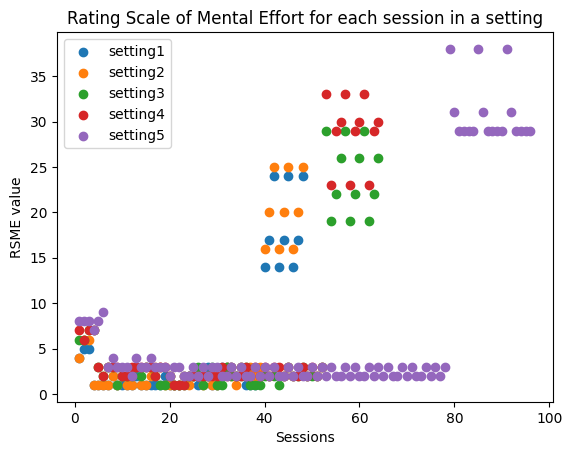

In [ ]:
RMSE = []
for key,val in temp_dict.items():
    for va in val:
        if(type(va) != str):
            RSME.append(va)
    # jitter([x for x in range(len(RSME))],RSME)

    plt.scatter([x for x in range(1,len(RSME)+1)],RSME,alpha=1)
    plt.legend(['setting1','setting2','setting3','setting4','setting5'])
    plt.xlabel('Sessions')
    plt.ylabel('RSME value')
    plt.title('Rating Scale of Mental Effort for each session in a setting')
    RSME = []

In [ ]:
responses_file = 'RSME (Responses) - Form Responses 1.csv'
df = pd.read_csv(responses_file)
#get header of dataframe
header = df.columns

anx_question = header[5:17]
# anx_dict = setting_dict.copy()
anx_dict = {
'setting1' : [],
'setting2' : [],
'setting3' : [],
'setting4' : [],
'setting5' : [],
}
opposite = [0,3,4,5,7,8,9,10,11]
#trverse through each row
for ind in df.index:
    sett = 'setting'+str((df['Setting'][ind]))
    sum = 0
    for i  in range(len(anx_question)):
        val = df[anx_question[i]][ind]
        val = val.split('-')[1]
        val = int(val)
        if(i in opposite):
            val = 5-val
        sum += val
    
    anx_dict[sett].append(sum)        


In [ ]:
print(anx_dict)

{'setting1': [14, 17, 24], 'setting2': [16, 20, 25], 'setting3': [29, 19, 22, 26], 'setting4': [33, 23, 29, 30], 'setting5': [38, 31, 29, 29, 29, 29]}


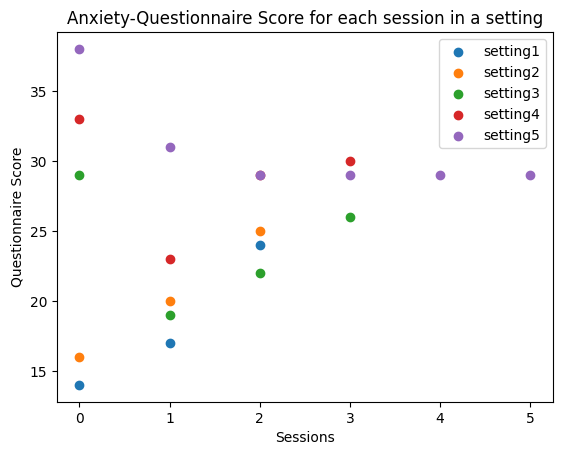

In [ ]:
anx = []
for key,val in anx_dict.items():
    for va in val:
        if(type(va) != str):
            anx.append(va)
    # print(RSME)

    # jitter([x for x in range(len(RSME))],RSME)
    plt.scatter([x for x in range(len(anx))],anx,alpha=1)
    plt.legend(['setting1','setting2','setting3','setting4','setting5'])
    plt.xlabel('Sessions')
    plt.ylabel('Questionnaire Score')
    plt.title('Anxiety-Questionnaire Score for each session in a setting')
    anx = []

In [ ]:
source_file = 'User_data/12345/session_2/12345_session_2_22-03-2023_21-59_HEP.csv'
df = pd.read_csv(source_file)
MW_source  = df['MW'].values

In [ ]:
dest_file = 'User_data/12350/session_2/12350_session_2_01-04-2023_15-57_HEP.csv'
df = pd.read_csv(dest_file)
df['MW'] = MW_source
df.to_csv(dest_file,index=False)


In [8]:
def create_matrix(df,flag):
    if(flag == 0):
        mw = df["MW"].values
    else:
        mw = df["ANX"]
    print(len(mw))
    if(flag==0):
        result = [[0,0,0],[0,0,0],[0,0,0]]
    else:
        result = [[0,0],[0,0]]
    prev = None
    for i in mw:
        if prev == None:
            prev = i
        else:
            result[int(prev-1)][int(i-1)] +=1
            prev = i
    return result

In [9]:
def create_error_trans(df,flag):
    if(flag == 0):
        result = [[0,0,0,0,0,0],[0,0,0,0,0,0]]
    else:
        result = [[0,0,0,0],[0,0,0,0]]
    if(flag == 0):
        mw = df["MW"].values
    else:
        mw = df["ANX"]
    state = df["State"].values
    prev_state = None
    prev_level = None
    for i in range(len(mw)):
        if prev_state == None:
            prev_state= state[i]
            prev_level = mw[i]
        else:
            curr_level = mw[i]
            curr_state = state[i]
            if(curr_level==1):
                result[prev_state][curr_state]+=1
            elif(curr_level==2):
                result[prev_state][curr_state+2]+=1
            elif(curr_level==3):
                result[prev_state][curr_state+4]+=1
            prev_state = curr_state
            prev_level = curr_level
    
    return result



In [10]:
def create_prob_tran_matrix(matrix,flag):
    if(flag==3):
        result = [[0,0,0],[0,0,0],[0,0,0]]
    else:
        result = [[0,0],[0,0]]
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            sum = np.sum(matrix[i])
            if(sum==0):
                sum =1
            result[i][j] = matrix[i][j]/sum
    return result

In [11]:
def param_state_prob(matrix):
    # calculate the eigenvalues and eigenvectors
    matrix = np.array(matrix)
    eigenvalues, eigenvectors = np.linalg.eig(matrix.T)

    # find the index of the eigenvalue closest to 1
    index = np.argmin(np.abs(eigenvalues - 1))

    # get the eigenvector corresponding to the eigenvalue 1
    eigenvector = eigenvectors[:, index]
    eigenvector = eigenvector / np.sum(eigenvector)

    # print("Eigenvalue: ", eigenvalues[index])
    # print("Eigenvector: ", eigenvector)

    return eigenvector
    

In [69]:
def get_error_state_prob_mat(matrix):
    mat_l = [[matrix[0][0],matrix[0][1]],[matrix[1][0],matrix[1][1]]]
    mat_2 = [[matrix[0][2],matrix[0][3]],[matrix[1][2],matrix[1][3]]]
    # mat_3 = [[matrix[0][4],matrix[0][5]],[matrix[1][4],matrix[1][5]]]
    prob_mat1 = create_prob_tran_matrix(mat_l,2)
    prob_mat2 = create_prob_tran_matrix(mat_2,2)
    # prob_mat3 = create_prob_tran_matrix(mat_3,2)
    return prob_mat1,prob_mat2

In [70]:
def geteigen(file):
    print(file)
    df = pd.read_csv(file)
    trans_mat = create_matrix(df,1)
    error_trans_mat = create_error_trans(df,1)
    prob_trans_mat = create_prob_tran_matrix(trans_mat,2)
    param_state_prob_mat= param_state_prob(prob_trans_mat)
    mat1,mat2= get_error_state_prob_mat(error_trans_mat)
    # mat1,mat2,mat3= get_error_state_prob_mat(error_trans_mat)
    param_state_prob_mat1= param_state_prob(mat1)
    param_state_prob_mat2= param_state_prob(mat2)
    # param_state_prob_mat3= param_state_prob(mat3)
    final_mat = [param_state_prob_mat1,param_state_prob_mat2]
    # final_mat = [param_state_prob_mat1,param_state_prob_mat2,param_state_prob_mat3]
    final_mat = np.array(final_mat)
    final_mat = final_mat.T
    # print(final_mat)

    #get the index of the max value in the array
    index_param = np.argmax(param_state_prob_mat)
    error_max =final_mat[1][index_param]
    return param_state_prob_mat[index_param]*error_max
# param_state_prob_mat= param_state_prob(mat)

In [55]:
file = 'User_data/12355/session_1/12355_session_1_03-04-2023_23-37_HEP.csv'
geteigen(file)

User_data/12355/session_1/12355_session_1_03-04-2023_23-37_HEP.csv
185
[[0.948051948051948, 0.05194805194805195], [0.14285714285714285, 0.8571428571428571]]
[[0.9555555555555556, 0.044444444444444446], [0.5, 0.5]]
[[0.88, 0.12], [0.6, 0.4]]
[[0.73333333 0.91836735 0.83333333]
 [0.26666667 0.08163265 0.16666667]]


0.41847826086956474

In [71]:
data_dir = Path.cwd()
data_dir = data_dir / 'User_data'
# MW = {}
ANX = {}


for user in data_dir.iterdir():
    for session in user.iterdir():
        for file in session.iterdir():
            if(file.name.endswith('_HEP.csv')):
                val = geteigen(file)
                ANX[str(file.parent)] = val

/home/niskal/Abhishek/OpenBCI_DataAnlaysis/User_data/12345/session_2/12345_session_2_22-03-2023_21-59_HEP.csv
185
/home/niskal/Abhishek/OpenBCI_DataAnlaysis/User_data/12345/session_1/12345_session_1_22-03-2023_21-53_HEP.csv
185
/home/niskal/Abhishek/OpenBCI_DataAnlaysis/User_data/12346/session_2/12346_session_2_22-03-2023_22-26_HEP.csv
185
/home/niskal/Abhishek/OpenBCI_DataAnlaysis/User_data/12346/session_1/12346_session_1_22-03-2023_22-21_HEP.csv
185
/home/niskal/Abhishek/OpenBCI_DataAnlaysis/User_data/12352/session_2/12352_session_2_02-04-2023_21-55_HEP.csv
185
/home/niskal/Abhishek/OpenBCI_DataAnlaysis/User_data/12352/session_1/12352_session_1_02-04-2023_21-51_HEP.csv
185
/home/niskal/Abhishek/OpenBCI_DataAnlaysis/User_data/12354/session_2/12354_session_2_03-04-2023_23-06_HEP.csv
185
/home/niskal/Abhishek/OpenBCI_DataAnlaysis/User_data/12354/session_1/12354_session_1_03-04-2023_23-02_HEP.csv
185
/home/niskal/Abhishek/OpenBCI_DataAnlaysis/User_data/12349/session_2/12349_session_2_23-

In [75]:
final_ANX = ANX
for key in final_ANX:
    # make the val two 5 decimal places
    final_ANX[key] = round(final_ANX[key],5)
    print(key,final_ANX[key])

/home/niskal/Abhishek/OpenBCI_DataAnlaysis/User_data/12345/session_2 0.20517
/home/niskal/Abhishek/OpenBCI_DataAnlaysis/User_data/12345/session_1 0.22826
/home/niskal/Abhishek/OpenBCI_DataAnlaysis/User_data/12346/session_2 0.09855
/home/niskal/Abhishek/OpenBCI_DataAnlaysis/User_data/12346/session_1 0.09387
/home/niskal/Abhishek/OpenBCI_DataAnlaysis/User_data/12352/session_2 0.04348
/home/niskal/Abhishek/OpenBCI_DataAnlaysis/User_data/12352/session_1 0.022
/home/niskal/Abhishek/OpenBCI_DataAnlaysis/User_data/12354/session_2 0.11208
/home/niskal/Abhishek/OpenBCI_DataAnlaysis/User_data/12354/session_1 0.1676
/home/niskal/Abhishek/OpenBCI_DataAnlaysis/User_data/12349/session_2 0.21739
/home/niskal/Abhishek/OpenBCI_DataAnlaysis/User_data/12349/session_1 0.4837
/home/niskal/Abhishek/OpenBCI_DataAnlaysis/User_data/12355/session_2 0.2747
/home/niskal/Abhishek/OpenBCI_DataAnlaysis/User_data/12355/session_1 0.08192
/home/niskal/Abhishek/OpenBCI_DataAnlaysis/User_data/12348/session_2 0.23913
/hom

In [76]:
final_MW = MW
for key,val in final_MW.items():
    # make the val two 5 decimal places
    final_MW[key] = round(val,5)
    print(key,val)


/home/niskal/Abhishek/OpenBCI_DataAnlaysis/User_data/12345/session_2 0.2005183436042164
/home/niskal/Abhishek/OpenBCI_DataAnlaysis/User_data/12345/session_1 0.09676275992438531
/home/niskal/Abhishek/OpenBCI_DataAnlaysis/User_data/12346/session_2 (0.04891304347826088+0j)
/home/niskal/Abhishek/OpenBCI_DataAnlaysis/User_data/12346/session_1 0.052309282965773786
/home/niskal/Abhishek/OpenBCI_DataAnlaysis/User_data/12352/session_2 0.022727272727272728
/home/niskal/Abhishek/OpenBCI_DataAnlaysis/User_data/12352/session_1 0.06901634950415436
/home/niskal/Abhishek/OpenBCI_DataAnlaysis/User_data/12354/session_2 0.13785347043701798
/home/niskal/Abhishek/OpenBCI_DataAnlaysis/User_data/12354/session_1 0.31521739130434784
/home/niskal/Abhishek/OpenBCI_DataAnlaysis/User_data/12349/session_2 0.1883861022655822
/home/niskal/Abhishek/OpenBCI_DataAnlaysis/User_data/12349/session_1 0.2959653647752395
/home/niskal/Abhishek/OpenBCI_DataAnlaysis/User_data/12355/session_2 0.13047479919311641
/home/niskal/Abhi

/tmp/ipykernel_26489/658711617.py:4: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a future release. Use `np.round` or `scalar.round` instead.
  final_MW[key] = round(val,5)


In [79]:
final_HEP = {}
for key in final_ANX:
    mw = final_MW[key]
    anx = final_ANX[key]
    final_HEP[key] = mw*anx
    #make the val two 5 decimal places
    final_HEP[key] = round(final_HEP[key],5)


/tmp/ipykernel_26489/2179425647.py:7: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a future release. Use `np.round` or `scalar.round` instead.
  final_HEP[key] = round(final_HEP[key],5)


In [78]:
#create a dataframe with header participant_ID,setting,PSF Mutliplier(MW), PSF Multiplier(ANX), PSF Multiplier, HEP score
df = pd.DataFrame(columns=['participant_ID','setting','PSF Multiplier(MW)','PSF Multiplier(ANX)','HEP score'])
count = 0
for key,val in final_HEP.items():
    temp = str(key).split('/')
    participant_ID = temp[6]
    mw = final_MW[key]
    anx = final_ANX[key]
    hep = final_HEP[key]
    setting = temp[7]
    df.loc[count] = [participant_ID,setting,mw,anx,hep]
    count+=1
    #place the values in the dataframe

df.to_csv('temp_HEP.csv',index=False)
    

In [3]:
def getCommScore(comm):
    temp = str(comm[0]).split(':')
    temp = temp[1].split(' ')
    times = []
    for t in temp:
        if(t!='' and t!='0'):
            times.append(float(t))
    avg = np.mean(times)

    temp = str(comm[1]).split(':')
    temp = temp[1].split(' ')
    acc = []
    for t in temp:
        if(t!=''):
            acc.append(float(t))
    acc = np.mean(acc)
    #round the values to 5 decimal places
    avg = round(avg,5)
    acc = round(acc,5)
    return avg,acc

In [4]:
def getsysmonscore(sysmon):
    acc = float(str(sysmon[1]).split(':')[1])/float(str(sysmon[0]).split(':')[1])
    time = str(sysmon[3]).split(':')[1]
    #round the values to 5 decimal places
    acc = round(acc,5)
    time = round(float(time),5)
    return float(time),float(acc)

In [5]:
def getTrackScore(track):
    temp = str(track[0]).split(':')[1]
    val = list(map(float,re.findall(r"[-+]?\d*\.\d+|\d+", temp)))
    avg_dev = np.mean(val)
    temp = str(track[1]).split(':')[1]
    val = list(map(float,re.findall(r"[-+]?\d*\.\d+|\d+", temp)))
    avg_time_out = np.mean(val)
    #round the values to 5 decimal places
    avg_dev = round(avg_dev,5)
    avg_time_out = round(avg_time_out,5)
    return avg_time_out,avg_dev

   

In [6]:
file = 'User_data/12345/session_1/12345_session_1_22-03-2023_21-53_scores.txt'

def getScore(file):
    with open(file,'r') as f:
        f = f.readlines()

    comm = f[1:3]
    comm = [x.strip() for x in comm]
    # print(getCommScore(comm))
    sysmon = f[5:9]
    sysmon = [x.strip() for x in sysmon]
    # print(getsysmonscore(sysmon))
    track = f[11:13]
    track = [x.strip() for x in track]
    # print(getTrackScore(track))
    return getCommScore(comm),getsysmonscore(sysmon),getTrackScore(track)


In [17]:
data_dir = Path.cwd()
data_dir = data_dir / 'User_data'
df = pd.DataFrame(columns=['participant_ID','setting','Avg Response Time Comm',
                           'Accuracy Comm','Avg Response Time Sysmon','Accuracy Sysmon',
                           'Avg Time Out (ms)','Mean Deviation'])

count = 0
for user in data_dir.iterdir():
    for session in user.iterdir():
        for file in session.iterdir():
            if(file.name.endswith('_scores.txt')):
                val = getScore(file)
                temp = str(file.parent).split('/')
                participant_ID = temp[6]
                setting = temp[7]
                # print(participant_ID,setting)
                df.loc[count] = [participant_ID,setting,val[0][0],val[0][1],val[1][0],val[1][1],val[2][0],val[2][1]]
                count+=1
                #place the values in the dataframe

df2 = pd.read_csv('temp_HEP.csv')
#convert df2['HEP score'] to float
# df2['HEP score'] = df2['HEP score'].a
df['HEP score'] = df2['HEP score'].apply(lambda x: float(x[1:-1]))
df['setting'] = df2['setting']

# df.to_csv('temp_scores.csv',index=False)
df


,participant_ID,setting,Avg Response Time Comm,Accuracy Comm,Avg Response Time Sysmon,Accuracy Sysmon,Avg Time Out (ms),Mean Deviation,HEP score
0,12345,5,20.46236,0.85714,1.16485,0.76471,1116.66667,0.03277,0.04114
1,12345,3,20.42840,0.83333,1.34678,0.76923,3010.00000,0.03552,0.02209
2,12346,5,13.94269,1.00000,1.26032,0.76471,806.66667,0.03084,0.00482
3,12346,4,19.00298,1.00000,1.42718,0.76923,1675.00000,0.03640,0.00491
4,12352,5,14.30876,1.00000,1.02426,0.95652,480.00000,0.02987,0.00099
5,12352,4,15.02721,1.00000,0.99961,1.00000,926.66667,0.02947,0.00152
6,12354,1,15.02000,1.00000,1.37393,0.85714,2316.66667,0.03593,0.01545
7,12354,4,30.00000,0.50000,1.44653,0.33333,2313.33333,0.02890,0.05283
8,12349,4,18.61304,1.00000,1.82146,0.46154,5655.00000,0.04989,0.04095
9,12349,2,30.00000,0.00000,1.84176,0.45455,7913.33333,0.05751,0.14316


In [27]:
#group two columns together
part = df['participant_ID'].astype(str) +'_'+ df['setting'].astype(str)
part = list(part)

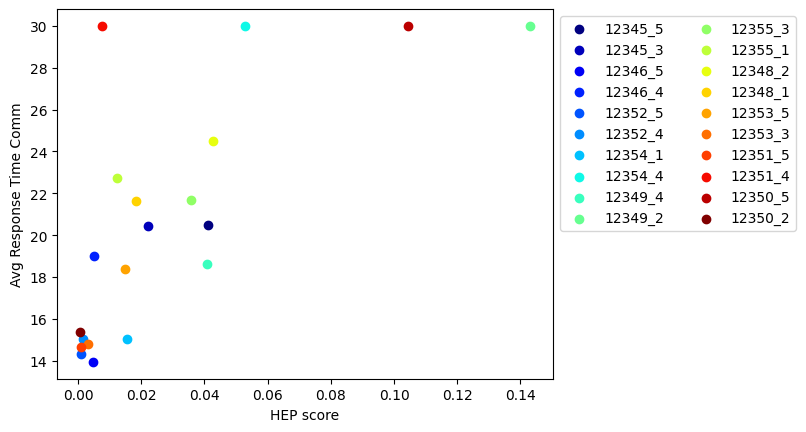

In [34]:
#plot with x-axis as HEP score, y -axis as Avg Response Time, and points as the participant ID

plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, len(part)))))
for i in range(len(part)):
    plt.scatter(df['HEP score'].values[i],df['Avg Response Time Comm'].values[i],label=part[i])
    #legend with two columns
    plt.legend(part,loc='upper left',bbox_to_anchor=(1,1),ncol=2)
    #define color cycle for the points
    plt.xlabel('HEP score')
    plt.ylabel('Avg Response Time Comm')

plt.show()

# plt.scatter(df['Avg Response Time Comm'].values,df['HEP score'].values)
# plt.legend(part)
# plt.ylabel('HEP score')
# plt.xlabel('Avg Response Time Comm')
# plt.show()
